In [ ]:
# Kaggle Titanic Competition 

### Content : 

- 



## 1. Introduction 

Ce Notebook implémente un modèle de regression logistique afin de prédire la survie de passager à 
bord du Titanic lors de son Naufrage, en utilisant les données mise à disposition sur Kaggle.com

### 1.1. Données 

Le jeu de donnée est fourni par Kaggle dans le cadre du challenge. 

### 1.2. Contexte

Citation du challenge de Kaggle : 

- The sinking of the Titanic is one of the most infamous shipwrecks in history.
- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
- In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 1.3. Nota Bene

Ce Notebook est l'expression de mon apprentissage du machine learning. Je ne suis en aucun cas un expert. Si des débutants en Machine Learning venaient à lire ces lignes, 
notez bien que ce qui suit n'est pas la meilleure façon de faire. Ce n'est qu'un essai d'aprentissage partagé a tous afin de recevoir des critiques constructives, et développer ma pensée. 



## 2. Importer les librairies nécessaires, et charger les données.  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



Chargement des données d'entrainement et de test. 

In [2]:
train_csv = pd.read_csv("./train.csv")
test_csv = pd.read_csv("./test.csv")


## 3. Exploration et analyse des données. 

In [4]:
#Combining train and test
all_data = pd.concat([train_csv, test_csv], axis=0).reset_index(drop=True)

#Duplicates and shapes
print(f"Nombre de doublons : {len(all_data.drop('Survived', axis=1))-len(all_data.drop('Survived', axis=1).drop_duplicates())}")
print(f"Dimensions du set train_csv:    {train_csv.shape}")
print(f"Dimensions du set test_csv:     {test_csv.shape}")
print(f"Dimensions du set complet : {all_data.shape}")

Number of duplicate rows: 0
Shape of train:    (891, 12)
Shape of test:     (418, 11)
Shape of all_data: (1309, 12)


In [10]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3.1. Passenger ID

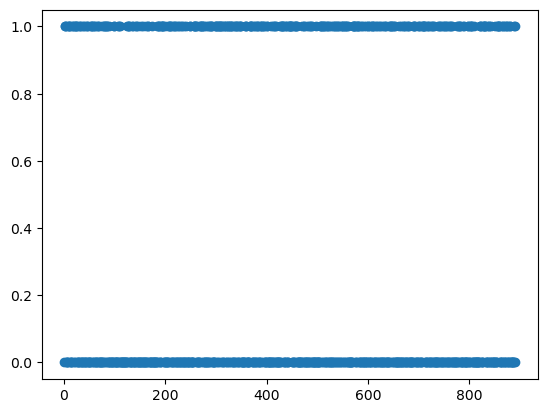

In [14]:
plt.figure()
plt.scatter(train_csv["PassengerId"], train_csv["Survived"])

### 3.2. Pclass

[3 1 2]


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

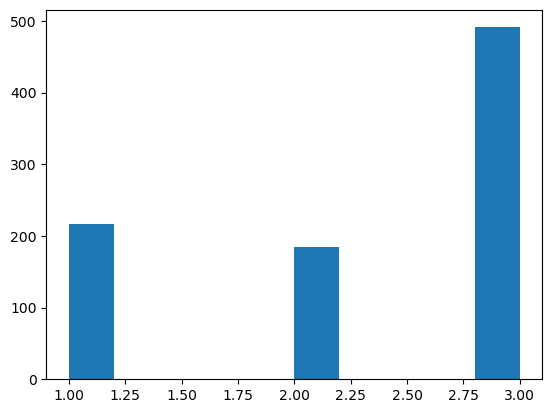

In [26]:
print(train_csv["Pclass"].unique())
plt.figure()
plt.hist(train_csv["Pclass"])

In [30]:
pclass_pivot = train_csv.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')
pclass_pivot.columns = ['No', 'Yes']
pclass_pivot['Total'] = pclass_pivot['Yes'] + pclass_pivot['No']
pclass_pivot['Survival %'] = round(pclass_pivot['Yes'] / (pclass_pivot['Yes'] + pclass_pivot['No']) * 100,1).astype(str) + '%'
pclass_pivot

NameError: name 'train' is not defined

### 3.3. Age

### 3.4. SibSp

### 3.5. Parch

### 3.6. Fare 

### 3.7. Survived

Text(0.5, 0, '')

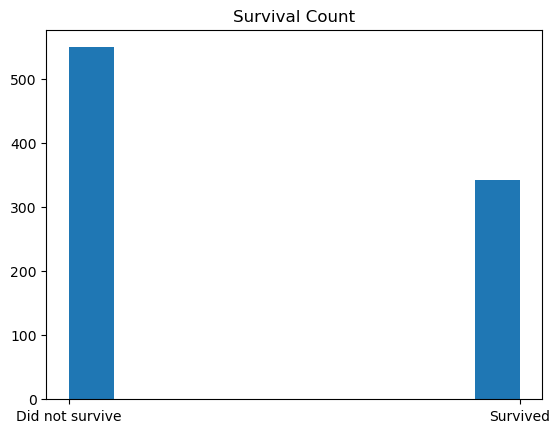

In [27]:
plt.figure()
plt.hist(train_csv["Survived"])
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.title("Survival Count")
plt.xlabel("")